In [1]:
# Imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import csv
import importlib
from tqdm import tqdm
from scripts import proj1_helpers, helpers
from scripts import implementation, feature_processing, k_fold, model_linear, model_logistic
import numpy as np

In [2]:
train_path = '../data/train.csv'
test_path  = '../data/test.csv'
output_path = '../data/linear_processed_submission.csv'

In [3]:
# loading data
y, X, idx = proj1_helpers.load_csv_data(train_path)
y_t, X_t, ids_t = proj1_helpers.load_csv_data(test_path)

In [4]:
X_p, (x_mean, x_std) = feature_processing.process_X(X, 2)
X_t_p, _ = feature_processing.process_X(X_t, 2, (x_mean, x_std))

100%|██████████| 5/5 [00:17<00:00,  3.30s/it]


In [ ]:
#Linear
model = implementation.ridge_regression
loss = model_linear.compute_accuracy_loss

idx_min_l, rmse_all_l, lambdas_l = k_fold.cross_validation_select(X_p, y, model, loss, seed = 1,
                                                            k_fold = 3, N = 20, do_plot = True, do_tqdm = True)

In [ ]:
lambda_ = lambdas[idx_min]
print(lambda_)
w, l = implementation.ridge_regression(y, X_p, lambda_ = 0)

 14%|█▎        | 68/500 [00:19<02:02,  3.53epoch/s, acc=-0.8, diff=0.152, grad=106, loss=7.35e+04, w=188] /home/sergei/Documents/repos/git/EPFL/ML/Project1/src/scripts/model_logistic.py:12: RuntimeWarning: overflow encountered in exp
  return -np.sum(np.multiply((tx @ w).flatten(), y.flatten())) + np.sum(np.log1p(np.exp(tx @ w)))
100%|██████████| 500/500 [02:59<00:00,  3.23epoch/s, acc=-0.8, diff=6.75e-09, grad=1.23, loss=7.39e+04, w=5.39]


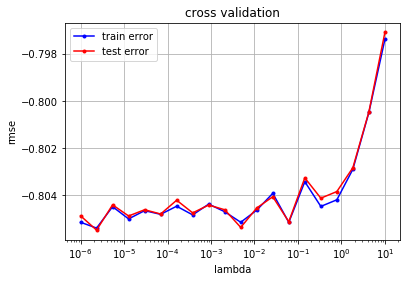

In [7]:
#Logistic
y_01 = helpers.y_to_01(np.array([y]).T)
np.random.seed(1)
w0 = np.zeros((X_p.shape[1], 1))#np.random.randn(X_p.shape[1], 1)
model = implementation.reg_logistic_regression_newton_batch
model_args = {'initial_w': w0, 'max_iters': 500, 'gamma': 5e-2, 'debug': False, 'batch_size': 50000}
#loss = model_logistic.reg_loss
loss = model_linear.compute_accuracy_loss

lambdas = np.logspace(-6, 1, 20)

idx_min, rmse_all, lambdas = k_fold.cross_validation_select(X_p, y_01, model, loss, kw_model = model_args, seed = 1,
                                                            k_fold = 3, lambdas = lambdas, do_plot = True, do_tqdm = False)

In [8]:
lambda_ = lambdas[idx_min]
print(lambda_)

2.33572146909e-06


In [ ]:
#w1, l = implementation.reg_logistic_regression(y_01, X_p, lambda_ = 0.1,
#                                                     initial_w = w0, max_iters = 100, gamma = 1e-6, debug = False)

In [ ]:
w1, l = implementation.reg_logistic_regression_newton_batch(y_01, X_p, lambda_ = 2.3e-6,
                                                     initial_w = w0, batch_size = 50000,
                                                     max_iters = 500, gamma = 1e-5, debug = False)

In [16]:
np.random.seed(42)
w2, l = implementation.reg_logistic_regression_newton_batch(y_01, X_p, lambda_ = 2.3e-6,
                                                     initial_w = w0, batch_size = 50000,
                                                     max_iters = 1000, gamma = 1e-2, debug = False)

 35%|███▌      | 351/1000 [02:13<04:12,  2.57epoch/s, acc=-0.8, diff=0.205, grad=55.2, loss=1.1e+05, w=160]  /home/sergei/Documents/repos/git/EPFL/ML/Project1/src/scripts/model_logistic.py:12: RuntimeWarning: overflow encountered in exp
  return -np.sum(np.multiply((tx @ w).flatten(), y.flatten())) + np.sum(np.log1p(np.exp(tx @ w)))
 83%|████████▎ | 834/1000 [05:11<00:58,  2.85epoch/s, acc=-0.81, diff=0.00229, grad=55.1, loss=inf, w=166] 


In [17]:
y_pred = proj1_helpers.predict_labels(w2, X_t_p)

In [19]:
proj1_helpers.create_csv_submission(ids_t, y_pred, output_path)

In [ ]:
tqdm.get_lock().locks = []

In [18]:
np.mean(y_pred>0)

0.30075954089659612